# 1 - Arrays and Strings

### Q1) Move Zeroes

Given an array of integers, write a function to move all 0's to the end while maintaining the relative order of the other elements.

In [53]:
# Time: O(N); Space = O(N)
def movezeroes(arr): # uses new temporary list, then appends 0s at back
    newarr = []
    newzeroes = 0
    for i in range(len(arr)):
        if arr[i] != 0:
            newarr.append(arr[i])
        else:
            newzeroes += 1
    return print(newarr + [0] * newzeroes)
    
array = [0,8,7,5,6,0,0,0,0,3,4,1999,2,0,3,-5,-1,2]
movezeroes(array)

# Time: O(N); Space = O(2) = O(1)
def movezeroes2(arr): # uses while loop to ensure numbers not skipped after using pop()
    i = 0 # index
    j = 0 # counts
    while j <= len(arr):
        if arr[i] == 0:
            arr.append(arr.pop(i))
            j += 1
        else:
            i += 1
            j += 1
    return print(arr)

array = [0,8,7,5,6,0,0,0,0,3,4,1999,2,0,3,-5,-1,2]
movezeroes2(array)

# Time: O(N^2) due to insert(); Space = O(1)
def movezeroes3(arr): # moves non-zeroes to the front
    j = 0
    for i in range(len(arr)):
        if arr[i] != 0:
            arr.insert(0+j,arr.pop(i))
            j += 1
    return print(arr)

array = [0,8,7,5,6,0,0,0,0,3,4,1999,2,0,3,-5,-1,2]
movezeroes3(array)

# Time: O(2N) = O(N); Space = O(1)
def movezeroes4(arr): # solution
    j = 0
    for i in arr:
        if arr[i] != 0:
            arr[j] = arr[i]
            j += 1
    for i in range(j,len(arr)):
        arr[i] = 0
    return print(arr)

array = [0,8,7,5,6,0,0,0,0,3,4,1999,2,0,3,-5,-1,2]
movezeroes3(array)

def movezeroes5(arr):

[8, 7, 5, 6, 3, 4, 1999, 2, 3, -5, -1, 2, 0, 0, 0, 0, 0, 0]
[8, 7, 5, 6, 3, 4, 1999, 2, 3, -5, -1, 2, 0, 0, 0, 0, 0, 0]
[8, 7, 5, 6, 3, 4, 1999, 2, 3, -5, -1, 2, 0, 0, 0, 0, 0, 0]
[8, 7, 5, 6, 3, 4, 1999, 2, 3, -5, -1, 2, 0, 0, 0, 0, 0, 0]


### Q2) Boats to Save People

Given an array *people* that consists of their weights, and an integer *limit* which each boat can at most carry. Each boat carries at most 2 people at the same time, given that their weight sum is at most limit. Find the minimum number of boats to carry everyone.

Prof sorts the array from smallest to largest, then use 2 pointers.
   - Use while loop as long as left <= right, because as long as left <= right, there are elements that are remaining. 
   - In particular when left = right, you have exactly 1 element left yet to be looked at. 
   - If left > right, all elements were searched for already / no one left.

The last else paragraph shows that there is no left person to match that right person, so he might as well take the boat by himself.

In [35]:
# Time: O(NlogN+N+3)=O(NlogN) because of sort; Space: O(3)=O(1)
def boatsave(arr,limit):
    left = 0
    right = len(arr)-1
    count = 0
    arr.sort() # both sort and sorted are O(NlogN) for time, but sort is O(1) space as it changes original list while sorted is O(N) space
    
    while left <= right:
        
        # last person remaining
        if left == right:
            count += 1
            print(arr[left],arr[right])
            break
            
        # meat - if found match
        if (arr[left] + arr[right]) <= limit:
            print(arr[left],arr[right])
            left += 1
            right -= 1
            count += 1  
            
        # no match - biggest guy alone
        else:
            print(arr[right])
            right -= 1
            count += 1
    
    return print(f'count is: {count}')

arr = [9,5,1,3,4,5,1,3,5,1,2,3,2,8,7,6]
boatsave(arr,9)

# # last part can also write as below
#         if (arr[left] + arr[right]) <= limit:
#             left += 1    
#         right -= 1
#         count += 1

9
1 8
1 7
1 6
2 5
2 5
3 5
3 4
3 3
count is: 9


### Q3 Valid Mountain Array

Given an array of integers, return True if below are fulfilled:
- len(arr) >= 3
- There exists some index i such that:
    - a[0] < a[1] < ... < a[i]    **>>> go up**
    - a[i] > a[i+1] > ... a[-1]   **>>> go down**
    
We need a "while i < len(arr)" because we don't want to return an IndexError message.

In [49]:
def validmountain(arr):
    # Check (but not necessary actually)
    if len(arr) < 3:
        return False
    
    # Meat
    i = 1
    while i < len(arr) and arr[i-1] < arr[i]: # ascending
        i+=1
    if i == 1 or i == len(arr): # midpoint check
        return False
    while i < len(arr) and arr[i-1] > arr[i]: # descending
        i += 1
    return i == len(arr) # check if at the end

validmountain([1,2,3,2,1])

True

### Q4 Container with Most Water

Give N non-negative integers (a1, a2..., ai), where each represents a point at coordinate (i, ai). Think of a x-y graph where (i,ai) is (x,y).

N vertical lines are drawn such that the two endpoints of line i is at (i, ai) and (i,0).

Find two lines, which together with x-axis forms a container, such that the container can contain the most water.

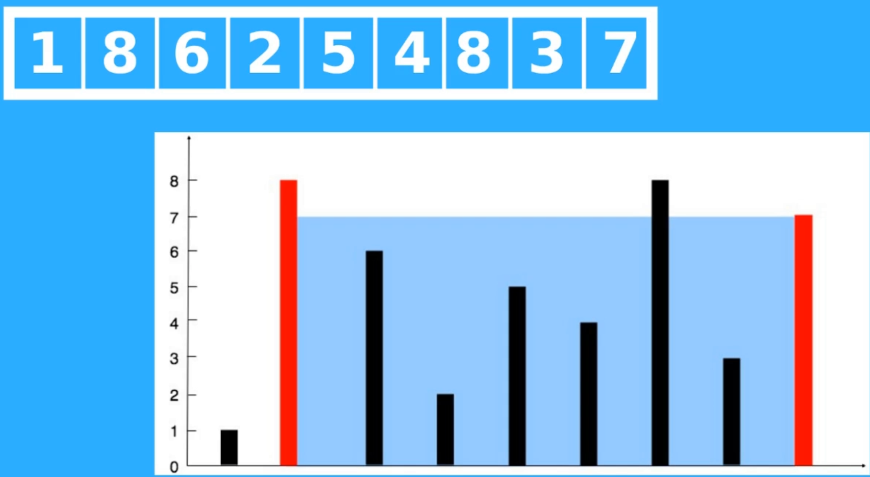

In [64]:
# Time: O(N^2); Space: O(1)
def watercontainer(arr):
    biggestcontainer = []
    biggestvolume = 0
    for i in range(len(arr)):
        for j in range(len(arr)):
            maxheight = min(arr[i],arr[j])
            length = j-i
            if maxheight*length > biggestvolume:
                biggestcontainer = [i,j]
                biggestvolume = maxheight*length
    print(f'biggest container uses indexes {biggestcontainer} to produce volume of {biggestvolume}')
    
arr = [1,8,6,2,5,4,8,3,7]
watercontainer(arr)

# Time: O(N); Space: O(1)
def watercontainer2(arr):
    left = 0
    right = len(arr)-1
    maxarea = 0
    
    while left < right:
        maxarea = max(maxarea, min(arr[left],arr[right]) * (right-left))
        if arr[left] < arr[right]: # move the shorter one
            left += 1
        else:
            right -= 1
    return maxarea

arr = [1,8,6,2,5,1001,10000,4,8,3,7]
watercontainer2(arr)

biggest container uses indexes [1, 8] to produce volume of 49


1001

### Q5 First Bad Version

Given a number N that represents the amount of software version and a function that accepts a number and returns whether it is a bad version or not, find the first bad version of the array.

If a version is bad, all versions after it are bad (because what is built on bad is bad as well).

This is basically **binary search**.

### Q6 Longest Substring without Repeating Characters

Given a string, find the length of the longest substring without repeating characters.

In [137]:
# Time O(N^2); Space O(N)
def longestuniquestring(string):
    
    thestring = ""
    maxlength = 0
    
    for i in range(len(string)):
        for j in range(i,len(string)):
            if len(string[i:j+1]) != len(set(string[i:j+1])):
                if len(string[i:j]) > maxlength:
                    thestring = string[i:j] 
                    maxlength = len(thestring)
                    print("fixing",thestring,maxlength)
                break
    
    return print(thestring,maxlength)
            
string = "abcabdefghijklmncbbabdefghijklmncb"
longestuniquestring(string)

def longestuniquestring2(string):
    mapping = {}
    left = 0
    right = 0
    ans = 0
    length = len(string)
    
    while left < length and right < length: # both pointers not exceed string
        
        element = string[right]
        if element in mapping: # if seen before
            left = max(left, mapping[element]+1) # move right from the place you last seen it. Because you see before, means whatever was between has already been counted.
        mapping[element] = right
        ans = max(ans, right - left + 1)
        right += 1
        print(f'L:{left}, R:{right}, Map:{mapping}, Length:{ans}')
        
    return print(ans)
    
string = "abcabdefghijklmncbbabdefghijklmncb"
longestuniquestring2(string)

fixing abc 3
fixing cabdefghijklmn 14
cabdefghijklmn 14
L:0, R:1, Map:{'a': 0}, Length:1
L:0, R:2, Map:{'a': 0, 'b': 1}, Length:2
L:0, R:3, Map:{'a': 0, 'b': 1, 'c': 2}, Length:3
L:1, R:4, Map:{'a': 3, 'b': 1, 'c': 2}, Length:3
L:2, R:5, Map:{'a': 3, 'b': 4, 'c': 2}, Length:3
L:2, R:6, Map:{'a': 3, 'b': 4, 'c': 2, 'd': 5}, Length:4
L:2, R:7, Map:{'a': 3, 'b': 4, 'c': 2, 'd': 5, 'e': 6}, Length:5
L:2, R:8, Map:{'a': 3, 'b': 4, 'c': 2, 'd': 5, 'e': 6, 'f': 7}, Length:6
L:2, R:9, Map:{'a': 3, 'b': 4, 'c': 2, 'd': 5, 'e': 6, 'f': 7, 'g': 8}, Length:7
L:2, R:10, Map:{'a': 3, 'b': 4, 'c': 2, 'd': 5, 'e': 6, 'f': 7, 'g': 8, 'h': 9}, Length:8
L:2, R:11, Map:{'a': 3, 'b': 4, 'c': 2, 'd': 5, 'e': 6, 'f': 7, 'g': 8, 'h': 9, 'i': 10}, Length:9
L:2, R:12, Map:{'a': 3, 'b': 4, 'c': 2, 'd': 5, 'e': 6, 'f': 7, 'g': 8, 'h': 9, 'i': 10, 'j': 11}, Length:10
L:2, R:13, Map:{'a': 3, 'b': 4, 'c': 2, 'd': 5, 'e': 6, 'f': 7, 'g': 8, 'h': 9, 'i': 10, 'j': 11, 'k': 12}, Length:11
L:2, R:14, Map:{'a': 3, 'b': 4,

### Q7 Find First and Last Position of Element in Sorted Array*

Given an array of integers sorted in ascending order, find the starting and ending position of a given target value.

When you see "sorted", think binary search. 

In [217]:
def firstlast(arr,target):
    left = getLeftPosition(arr,target)
    right = getRightPosition(arr,target)
    return left,right

def getLeftPosition(arr,target):
    left = 0
    right = len(arr)-1
    
    while left <= right:
        
        mid = (right-left)//2 + left
        
        # below code runs if you find your target
        if arr[mid] == target:
            if mid-1 >= 0 and arr[mid-1] != target or mid == 0: # check for error | to check if it's the starting position. if True, then it is! | if it's the first ever element
                return mid
            right = mid - 1
        # if not, move around
        elif arr[mid] > target:
            right = mid-1
        else:
            left = mid+1

def getRightPosition(arr,target): # actually similar
    left = 0
    right = len(arr)-1
    
    while left <= right:
        mid = (right-left)//2 + left
        # below code runs if you find your target
        if arr[mid] == target:
            if mid+1 < len(arr) and arr[mid+1] != target or mid == len(arr)-1: # check for error | to check if it's the starting position. if True, then it is! | if it's the first ever element
                return mid
            left = mid + 1
        # if not, move around
        elif arr[mid] > target:
            right = mid-1
        else:
            left = mid+1

array = [1,1,1,1,2,2,2,2,2,3,3,3,3,3,4,4,4,4,4,4,5,5,5,5,5,6,6,6,7,7,7,7,7,7,8,9,9,9,9,10,10,11]
firstlast(array,11)

(41, 41)

# 2 - Math

### Q1 Missing Number

Given an array of n distinct numbers (0,1,2,3,...,n). Find the missing value.

    input = [3, 0, 1]
    output = 2
    
The math way to solve this is using **Gauss formula** where the sum to N is equals to n * (n+1) / 2.

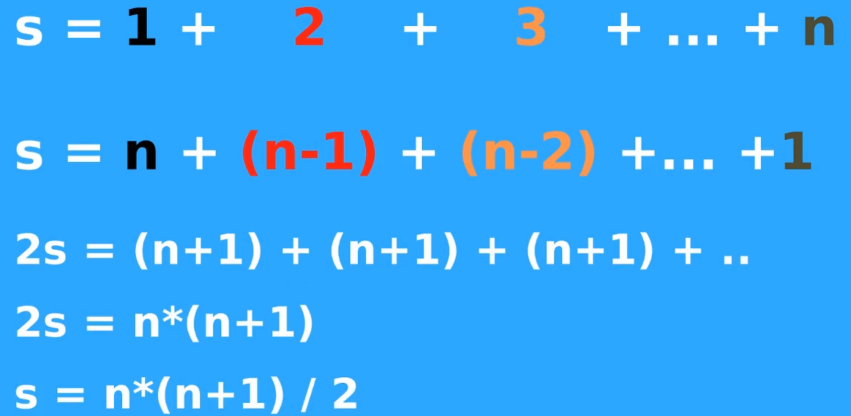

In [240]:
def missingnumber(arr):
    maxnumber = max(arr)
    fullset = set([n for n in range(maxnumber+1)])
    currentset = set(arr)
    return fullset.difference(currentset)

array = [3,0,1,5,2,4,7,6,9,8,11]
missingnumber(array)

# also can do hash maps: but O(N)
# can do merge sort / quick sort: but O(NlogN)

# Time O(N) due to sum(); Space O(1)
def missingnumber2(arr):
    n = len(arr) 
    maxsum = (n*(n+1))/2
    return maxsum - sum(arr)
    
array = [3,0,1,5,2,4,7,6,9,8,11]
missingnumber2(array)

10.0

### Q2 Count Primes

Count the number of prime numbers less than a given non-negative number. We will use the **Sieve of Eratosthenes** algorithm.

1. Create boolean array of size n, with all True except 0,1.
    
        isPrime = [False,False,True,True,True...]
    
2. Start a loop with index i from 2 to square root of N.
3. Set all multiples of i up to N to False in the boolean array.
4. Return number of True left.

In [40]:
def countprimes(N):
    #sieve of eratosthenes to find primes
    isPrime = [False,False] + [True]*(N-1)
    
    for i in range(2,N+1):
#         print("before:",isPrime)
        if isPrime[i] == True:
            for j in range(i+1,N+1):
                if j % i == 0:
                    isPrime[j] = False
#         print("after :", isPrime)
    return print(sum(isPrime), isPrime)

countprimes(11)

### prof's answer to check until sqrt(N) because anything after that already considered

def countprimes2(N):
    
    if N < 2:
        return 0
    
    from math import ceil, sqrt
    isPrime = [False,False] + [True]*(N-1)
    
    for i in range(2, ceil(sqrt(N))): # sqrt, then round up
        if isPrime[i]: # if still True that it may be a prime no.
            for multiples_of_i in range(i*i,N,i): # check its multiples
                isPrime[multiples_of_i] = False
                
    return print(sum(isPrime), isPrime)

countprimes2(11)

5 [False, False, True, True, False, True, False, True, False, False, False, True]
5 [False, False, True, True, False, True, False, True, False, False, False, True]


### Q3 Single Number

Given an array where every integer appears twice except for one. Find it. 

Prof answer make use of this:

        2*(a+b+c) - (a+a+b+b+c) = c

In [57]:
# Time O(N^2), Space O(N)
def singlenumber(arr):
    thedict = {}
    for i in arr:
        if i in thedict:
            thedict.pop(i)
        else:
            thedict[i] = 1
    return print([k for k in thedict.keys()][0])

arr = [1,1,2,2,3,3,4,4,5,6,6,7,7]
singlenumber(arr)

# Time O(N), Space O(N)
def singlenumber2(arr):
    fullset_sum = sum(set(arr))*2
    currentset_sum = sum(arr)
    return print(fullset_sum - currentset_sum)

arr = [1,1,2,2,3,3,4,4,5,6,6,7,7]
singlenumber(arr)

5
5


### Q4 Robot Returns to Origin

Imagine a robot standing at position (0,0) in a 2D grid. Given a string consisting of its moves, find the final location of the robot.

    U = up, D = down, R = right, L = left

In [60]:
def robot(string):
    X = 0
    Y = 0
    for i in string:
        if i == "U":
            Y += 1
        elif i == "D":
            Y -= 1
        elif i == "L":
            X -= 1
        elif i == "R":
            X += 1
    return (X,Y)

string = "UUDDLRLRLRDDDUUURLDRDRL"
robot(string)

(1, -2)

### Q5 Add Binary

Given 2 binary strings, return their sum.

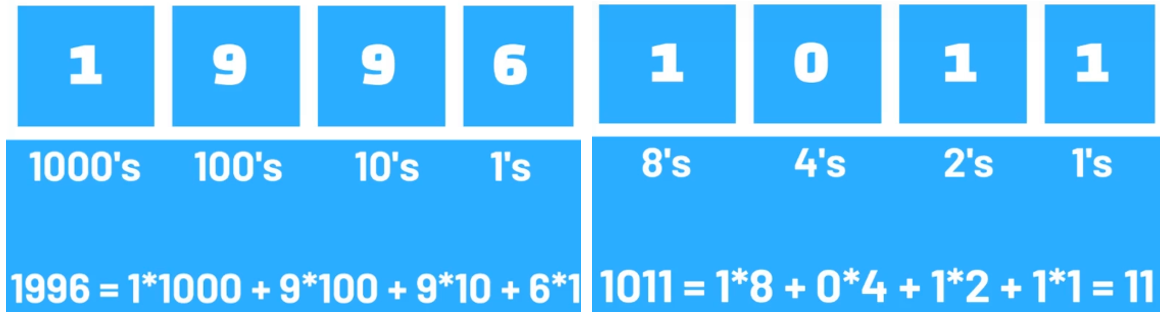

<div>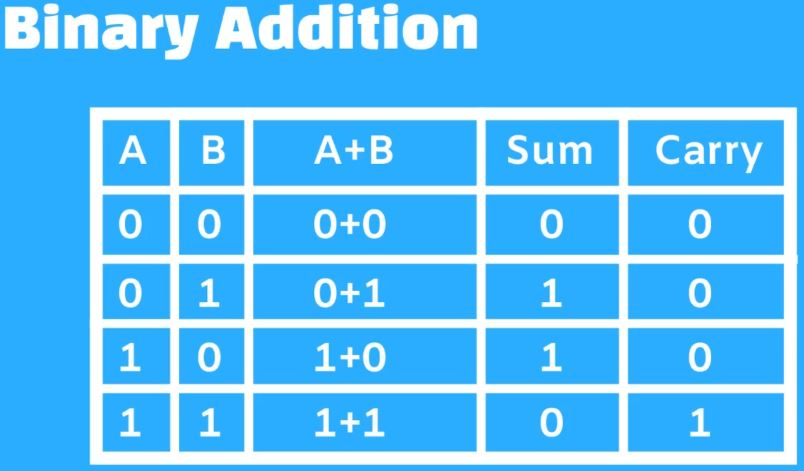</div>
<div>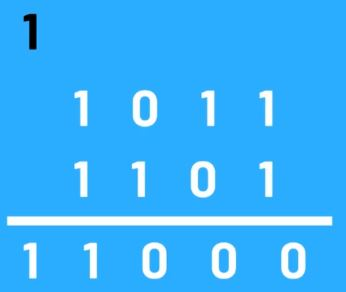</div>

In [62]:
# Time O(N), Space O(N)
def addbinary(a,b):
    results = []
    carry = 0 # if 1 + 1, then got carry
    i = len(a)-1
    j = len(b)-1
    
    while i >= 0 or j >= 0 or carry:
        total = carry
        if i >= 0:
            total += int(a[i])
            i -= 1
        if j >= 0:
            total += int(b[j])
            j -= 1
        results.append(str(total%2))
        carry = total//2
    
    return ''.join(reversed(results))

a = "111"
b = "101"
addbinary(a,b)

'1100'

# 3 - Hash Tables

We solve collisions with either **chaining** (linked lists) or **open addressing** (use **linear probing** to find the next best available slot; also have quadratic probing and double hashing).

<ins>Chaining vs Open Addressing</ins>

    >> Chaining VS Open Addressing
    >> Simple to implement vs Requires more computation
    >> Hash tables never get full vs Hash tables can get full
    >> Cache performance of chaining is not good vs Open addressing provides better cache performance
    >> Uses extra space for links vs No extra space is required
    >> Mostly used when no. of keys is unknown vs Mostly used when the frequency and number of keys is known
    
Usually the case is we don't know no. of keys, so chaining is the most used one.

### Q1 Two Sums

Given an array and a target, return 2 indices that have numbers that add up to target.

Remember that using **in** for arrays is O(N), but for dicts / sets is O(1)!

In [8]:
# Time O(N), Space O(N)
def twosums(arr,target):
    mapping = {} # note! store as m[value] = index instead!
    for i in range(len(arr)):
        mapping[arr[i]] = i
        if target-arr[i] in mapping:
            print(mapping)
            return mapping[target-arr[i]],i
        
arr = [1,4,3,2,6,13,8,7,6,5]
twosums(arr,11)

{1: 0, 4: 1, 3: 2, 2: 3, 6: 4, 13: 5, 8: 6}


(2, 6)

### Q2 Contains Duplicates

Given an array of integers, find if it contains duplicates (True/False).

In [24]:
# Time O(N), Space O(N)
def containsduplicates(arr):
    mapping = {}
    for i in arr:
        if i in mapping:
            return True
        mapping[i] = 1
    return False

arr = [1,2,3,4,5,6,7,8,9,10,10]
arr2 = [1,2,3,4,5,6,7,8,9,10,11]
print(containsduplicates(arr), containsduplicates(arr2))

# another answer but top is good
# Time O(2N), Space O(1)
def containsduplicates(arr):
    arr.sort()
    for i in range(1,len(arr)):
        if arr[i] == arr[i-1]:
            return True
    return False

arr = [12,1,2,3,4,5,6,7,8,9,10,10]
arr2 = [12,1,2,3,4,5,6,7,8,9,10,11]
print(containsduplicates(arr), containsduplicates(arr2))

# another method using sets
# Time O(N), Space O(N)
def containsduplicates(arr):
    if len(arr) != len(set(arr)):
        return True
    return False

arr = [1,2,3,4,5,6,7,8,9,10,10]
arr2 = [1,2,3,4,5,6,7,8,9,10,11]
print(containsduplicates(arr), containsduplicates(arr2))

True False
True False
True False


### Q3 Find Majority

Given an array of integers of size N, find the majority element (appears more than 50% of the times). A **majority element** appears more than N/2 times.

In [36]:
# Time O(N), Space O(N)
def findmajority(arr):
    mapping = {}
    for i in range(len(arr)):
        if arr[i] not in mapping:
            mapping[arr[i]] = 0
        mapping[arr[i]] += 1
        if mapping[arr[i]] > len(arr)/2:
            return arr[i]
    return "Not exist"

arr = [1,2,3,4,5,6,6,6,6,6,7,6,6]
findmajority(arr)

6

### Q4 Group Anagrams

Given an array of strings, group anagrams together.

Key to note that anagrams if sorted, have the same length and letters.

In [41]:
# sorted is O(NlogN)
# Time = O(N * MlogM) where N is arr length and M is len of biggest string in arr
# Space = O(N)
def groupanagrams(arr):
    mapping = {}
    for i in range(len(arr)):
        sortedword = ''.join(sorted(arr[i]))
        if sortedword not in mapping:
            mapping[sortedword] = []
        mapping[sortedword].append(arr[i])
    return mapping

array = ['bat','tab','bar','ran','arn','bear','sear','brae']
groupanagrams(array)

{'abt': ['bat', 'tab'],
 'abr': ['bar'],
 'anr': ['ran', 'arn'],
 'aber': ['bear', 'brae'],
 'aers': ['sear']}

### Q4 4sum II

Given four lists A B C D of integer values, compute how many tuples (i,j,k,l) there are such that A[i] + B[j] + C[k] + D[l] is zero.

The trick is to recognise that no matter what numbers you use, A[i]+B[j] **will always be equals to the negative of** C[k]+D[l].

    A[i]+B[j]+C[k]+D[l] = 0
    A[i]+B[j] = -(C[k]+D[l])

In [46]:
# Time O(N^2), Space O(N)

def foursum(A,B,C,D):
    mapping = {}
    countofmatches = 0
    
    for i in range(len(A)):
        for j in range(len(B)):
            theirsum = A[i] + B[j]
            if theirsum not in mapping:
                mapping[theirsum] = 0
            mapping[theirsum] += 1
            
    for k in range(len(C)):
        for l in range(len(D)):
            theirsum = -(C[k] + D[l])
            if theirsum in mapping:
                countofmatches += mapping[theirsum]
                
    return countofmatches

A = [1,2,3,4,5]
B = [-1,-2,-3,-4,-5]
C = [3,3,4,1,2]
D = [10,8,3,2,4,-999,-1]
foursum(A,B,C,D)

21

### Q5 LRU Cache

Design and implement a data structure for **Least Recently Used (LRU) cache**. It should support the get and put operations:

- get(key): gets the value (will always be positive) of the key if the key exists in the cache. If not, return -1.
- put(key,value): inserts the value if the key is not already present. If exists, then overwrite.
- Both must be O(1) time complexity.

Also:
- When the cache reaches its capacity, put(key,value) should invalidate the least recently used item before inserting a new item.
- The cache is initialised with a positive capacity.

<ins>Other Notes</ins>
- A cache is a memory that stores data for it to be served faster in the future. Its purpose is to speed up data requests.
- LRU is a policy that is used to remove items from the cache. While stacks follow LIFO, queues follow FIFO, a cache can follow the LRU policy.
- For eg, cache = [2,3,4,5]. This means 2 was accessed the most recently, and 5th the longest ago. Hence if we want to add a new item, we want to add it at the front of the cache [1,2,3,4] because that means that 1 was the most recently used item. We will remove the least recently used item aka 5. Furthermore, if we want to access 2 with get(), then 2 is the most recently used and so cache will be [2,1,3,4].

#### Solution

The solution is to implement both a **hash map** and a **deque**. Whenever we want to access quickly, the hash maps provide an O(1) experience. Whenever we want to add a new item, pop() and add() is always O(1) for the hash map and deque. The deque also helps to track the order.

All in all, it allows quick insertion/removal at both ends, and fast access in the middle. See [here](https://stackoverflow.com/questions/54730706/why-use-a-doubly-linked-list-and-hashmap-for-a-lru-cache-instead-of-a-deque).

In [ ]:
from collections import deque

class LRUCache():
    def __init__(self,capacity):
        self.c = capacity
        self.m = {}
        self.deq = deque()
        
    def get(self,key):
        if key in self.m:
            value = self.m[key] # get value
            self.deq.remove(key) # remove
            self.deq.append(key) # append at right side
            return value
        else:
            return -1
        
    def put(self,key,value):
        if key not in self.m:
            if len(self.deq) == self.c: # if full
                oldest = self.deq.popleft() # delete from deque
                del self.m[oldest] # delete from hash table
        else:
            self.deq.remove(key) # delete from deque only
            
        self.m[key] = value # add new into HT
        self.deq.append(key) # add new into deque right side

### Q6 [Minimum Window Substring](https://leetcode.com/problems/minimum-window-substring/solution/)

Given strings S and T, find the minimum window in S that will contain all the characters in T.

    S = "ADOBECODEBANCC"
    T = "ABC"
    Answer = "BANC"

In [66]:
def minWindow(S,T):
    len1 = len(S) # S = string
    len2 = len(T) # T = pattern
    
    if len1 < len2:
        return ""
    
    hashPattern = {}
    hashString = {}
    
    # create hashmap for the pattern
    for i in range(len2):
        if T[i] not in hashPattern:
            hashPattern[T[i]] = 0
        hashPattern[T[i]] += 1
        
    count = 0
    left = 0
    startIndex = -1
    minlen = float("inf")
    
    for right in range(len1):
        
        # create hash map for the string
        if S[right] not in hashString:
            hashString[S[right]] = 0
        hashString[S[right]] += 1
        
        if S[right] not in hashPattern:
            hashPattern[S[right]] = 0 # purely for math comparison purposes
        if hashString[S[right]] <= hashPattern[S[right]]:
            count += 1 # keep incrementing the count if string hash is less than pattern hash. count is to track no. of letter matches
            
        if count == len2: # if desired window is found
            while hashString[S[left]] > hashPattern[S[left]]: # triggers only if you found an excess desired letter
                hashString[S[left]] -= 1
                left += 1
                
            windowLen = right-left+1
            if minlen > windowLen:
                minlen = windowLen
                startIndex = left
            
    if startIndex == -1:
        return ""
    return S[startIndex:startIndex+minlen]    
        
S = "AAZABCDEFG"
T = "AAA"
minWindow(S,T)

S, T = "ADOBECODEBANCC", "ABC"
minWindow(S,T)

{'A': 3, 'Z': 1, 'B': 1, 'C': 1, 'D': 1, 'E': 1, 'F': 1, 'G': 1}
{'A': 1, 'D': 0, 'O': 0, 'B': 1, 'E': 0, 'C': 2, 'N': 1}


'BANC'

# 4 - Stacks and Queues

- Stacks = LIFO
    - push() adds on top. O(1)
    - top() / peek() sees what is on top. O(1)
    - pop() to pop the top. O(1)
    
- Queues = FIFO
    - enqueue() appends to queue's back. O(1)
    - front() / peek() sees what is front / what is gonna pop out. O(1)
    - dequeue() pops the front. O(1)